# Signal to Noise ratio

In [38]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal

import soundfile as sf 


In [39]:
def my_quant(x, Q):
    r"""Saturated uniform midtread quantizer

    input:
    x  input signal
    Q  number of quantization steps
    output:
    xq quantized signal

    Note: for even Q in order to retain midtread characteristics,
    we must omit one quantization step, either that for lowest or the highest
    amplitudes. Typically the highest signal amplitudes are saturated to
    the 'last' quantization step. Then, in the special case of log2(N)
    being an integer the quantization can be represented with bits.
    """
    tmp = Q//2  
    quant_steps = (np.arange(Q) - tmp) / tmp 

    xq = np.round(x*tmp) / tmp

    xq[xq < -1.] = -1.
    
    tmp2 = ((Q-1) - tmp) / tmp  
    xq[xq > tmp2] = tmp2
    return xq

In [40]:
def check_quant_SNR(x, dBoffset, title):
    print('std: {0:f}, var: {1:f}, mean: {2:f} of x'.format(np.std(x), np.var(x), np.mean(x)))
    Bmax = 24
    SNR = np.zeros(Bmax+1)
    SNR_ideal = np.zeros(Bmax+1)

    for B in range(1, Bmax+1): 
        xq = my_quant(x, 2**B)
        SNR[B] = 10*np.log10(np.var(x) / np.var(xq-x))
        SNR_ideal[B] = B*20*np.log10(2) + dBoffset  

    plt.figure(figsize=(5, 5))
    plt.plot(SNR_ideal, 'o-', label='theoretical', lw=3)
    plt.plot(SNR, 'x-', label='simulation')
    plt.xticks(np.arange(0, 26, 2))
    plt.yticks(np.arange(0, 156, 12))
    plt.xlim(2, 24)
    plt.ylim(6, 148)
    plt.xlabel('number of bits')
    plt.ylabel('SNR / dB')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    print('maximum achievable SNR = {0:4.1f} dB at 24 Bit (i.e. HD audio)'.format(SNR[-1]))    

In [41]:
N = 10000
k = np.arange(N)

std: 0.198050, var: 0.039224, mean: -0.000543 of x
maximum achievable SNR = 136.2 dB at 24 Bit (i.e. HD audio)


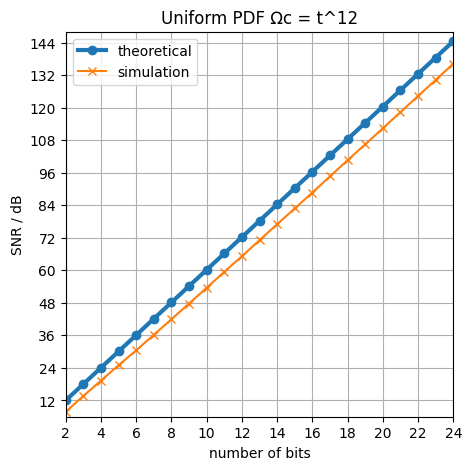

In [42]:
t = np.linspace(-1, 1, N)
Omega_c = t**12
np.random.seed(4)
x = np.random.rand(N)
x -= np.mean(x)
x *= np.sqrt(1/3) / np.std(x)
x = x * np.sin(2 * np.pi * Omega_c)
dBoffset = 0
check_quant_SNR(x, dBoffset, 'Uniform PDF Ωc = t^12')

std: 0.326462, var: 0.106578, mean: 0.094528 of x
maximum achievable SNR = 140.4 dB at 24 Bit (i.e. HD audio)


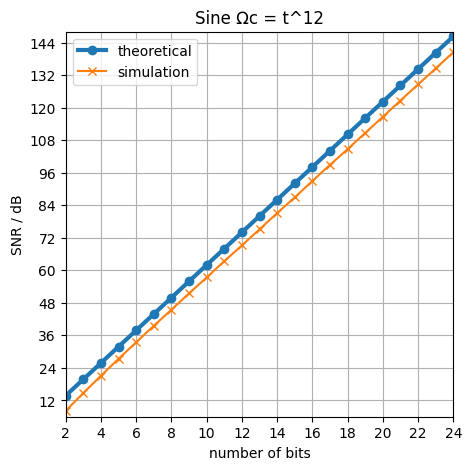

In [43]:
t = np.linspace(-1, 1, N)
Omega_c = t**12
sigma2 = 1 / 2
dBoffset = -10 * np.log10(2 / 3)
x = np.sqrt(2 * sigma2) * np.sin(2 * np.pi * Omega_c)
check_quant_SNR(x, dBoffset, 'Sine Ωc = t^12')

std: 0.071213, var: 0.005071, mean: -0.000163 of x
maximum achievable SNR = 127.4 dB at 24 Bit (i.e. HD audio)


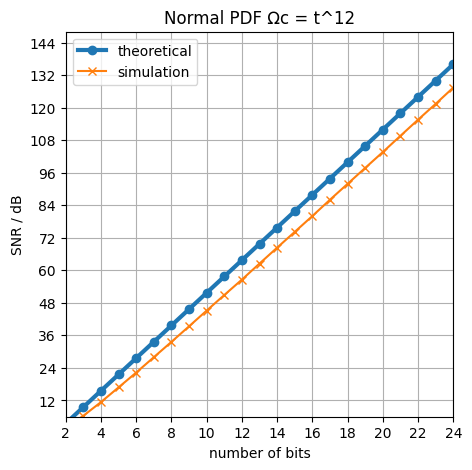

In [44]:
t = np.linspace(-1, 1, N)
Omega_c = t**12
np.random.seed(4)
x = np.random.randn(N)
x -= np.mean(x)
x *= np.sqrt(0.0471) / np.std(x)
x = x * np.sin(2 * np.pi * Omega_c)
dBoffset = -8.5  
check_quant_SNR(x, dBoffset, 'Normal PDF Ωc = t^12')

std: 0.042138, var: 0.001776, mean: -0.000125 of x
maximum achievable SNR = 122.9 dB at 24 Bit (i.e. HD audio)


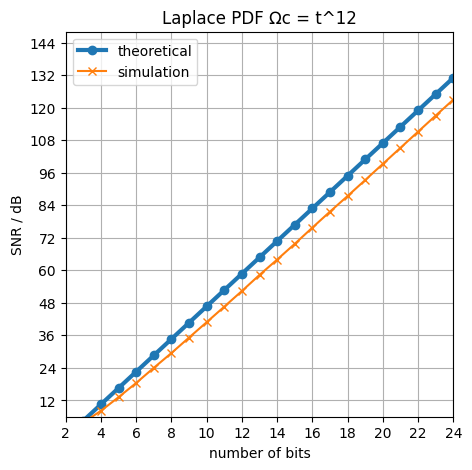

In [45]:
np.random.seed(4)
x = np.random.laplace(size=N)
pClip = 1e-5  
sigma = -np.sqrt(2) / np.log(pClip)
x -= np.mean(x)
x *= sigma / np.std(x)
x = x * np.sin(2 * np.pi * Omega_c)
dBoffset = -13.5  
check_quant_SNR(x, dBoffset, 'Laplace PDF Ωc = t^12')